In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/2%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/carros_manipulado.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,motor,marca,modelo,preco,quilometragem,ano,informacoes
0,1.4,Chevrolet,Agile,25990,91000,2011,Agile 1.4 Lt 5p
1,1.4,Chevrolet,Agile,28900,123915,2013,Agile 1.4 Ltz 5p
2,1.4,Chevrolet,Agile,28000,91000,2013,Agile 1.4 Lt 5p
3,1.4,Chevrolet,Agile,26890,151000,2011,Agile 1.4 Mpfi Ltz 8v
4,1.4,Chevrolet,Agile,31990,106863,2014,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16735 entries, 0 to 16734
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   motor          15613 non-null  float64
 1   marca          16735 non-null  object 
 2   modelo         16735 non-null  object 
 3   preco          16735 non-null  int64  
 4   quilometragem  16735 non-null  object 
 5   ano            16735 non-null  int64  
 6   informacoes    16735 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 915.3+ KB


 - Excluindo os valores ausentes.

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

motor            0
marca            0
modelo           0
preco            0
quilometragem    0
ano              0
informacoes      0
dtype: int64

In [9]:
df.shape

(15613, 7)

 - Convertendo a coluna quilometragem para formato numérico.

In [12]:
df.query('quilometragem == "131,16"')

,motor,marca,modelo,preco,quilometragem,ano,informacoes
33,1.4,Chevrolet,Agile,26500,"131,16",2012,Agile Agile Lt 1.4 Mpfi 8v Flexpower 5p


In [18]:
df['quilometragem'] = df['quilometragem'].str.replace(',','0')
df['quilometragem'] = df['quilometragem'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 16734
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   motor          15613 non-null  float64
 1   marca          15613 non-null  object 
 2   modelo         15613 non-null  object 
 3   preco          15613 non-null  int64  
 4   quilometragem  15613 non-null  float64
 5   ano            15613 non-null  int64  
 6   informacoes    15613 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 975.8+ KB


 - Observando outliers

In [30]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
motor,15613.0,1.878000e+00,7.140000e-01,1.0,1.5,1.8,2.0,6.200000e+00
preco,15613.0,7.897438e+04,4.581544e+05,1000.0,30999.0,50916.0,87990.0,3.990000e+07
quilometragem,15613.0,6.404919e+14,8.003074e+16,-558038585.0,31258.0,75000.0,118000.0,1.000000e+19
ano,15613.0,2.013953e+03,5.393000e+00,1968.0,2011.0,2014.0,2018.0,2.022000e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF61880>,
      dtype=object)

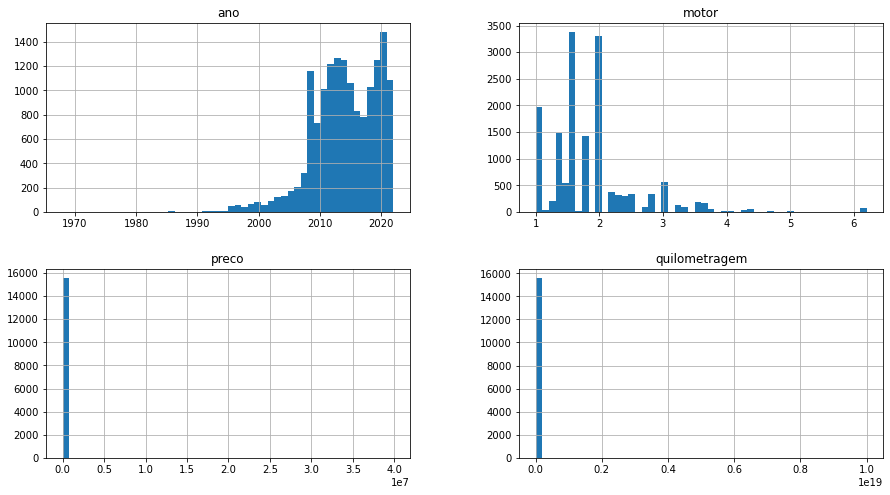

In [26]:
df.hist(bins = 50, figsize=(15,8))

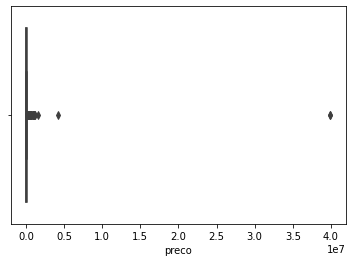

In [25]:
sns.boxplot(df['preco'])

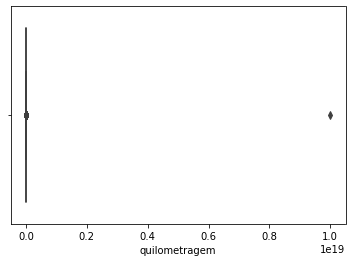

In [31]:
sns.boxplot(df['quilometragem'])

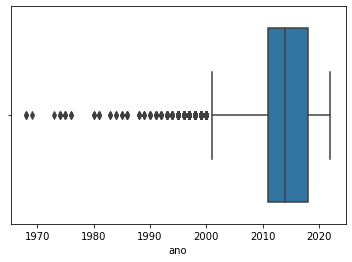

In [32]:
sns.boxplot(df['ano'])

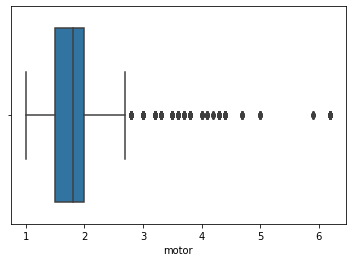

In [33]:
sns.boxplot(df['motor'])

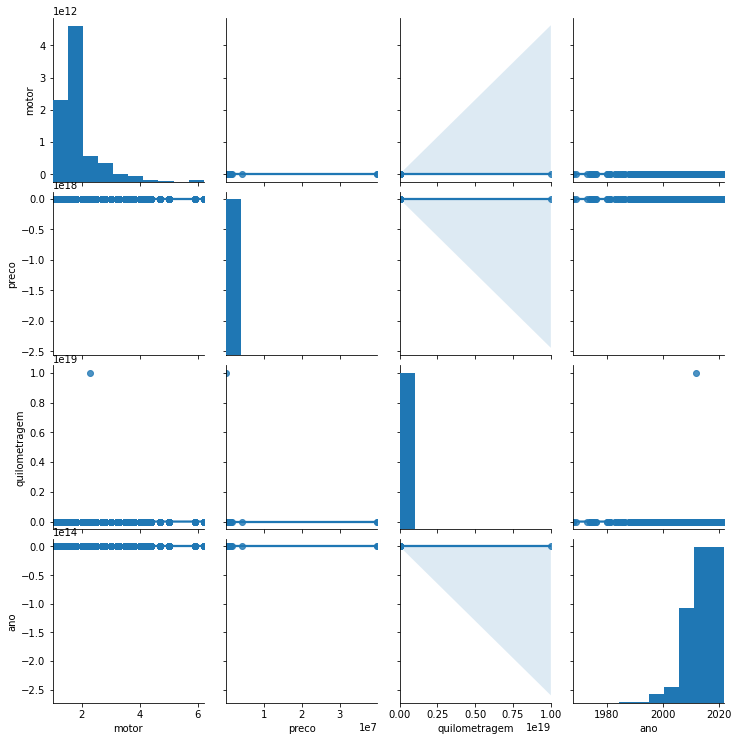

In [35]:
sns.pairplot(data=df, kind='reg')

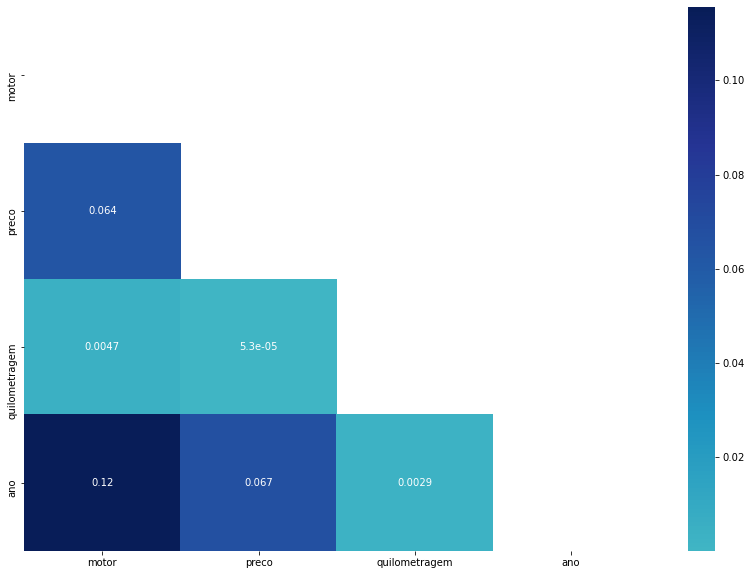

In [34]:
plt.figure(figsize=(14,10))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

 - Estabelecendo filtros para melhorar a distribuição dos dados

In [49]:
df = df.query('preco <=130000')
df = df.query('quilometragem >= 15000')
df = df.query('ano >=2000')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001152CD30>,
      dtype=object)

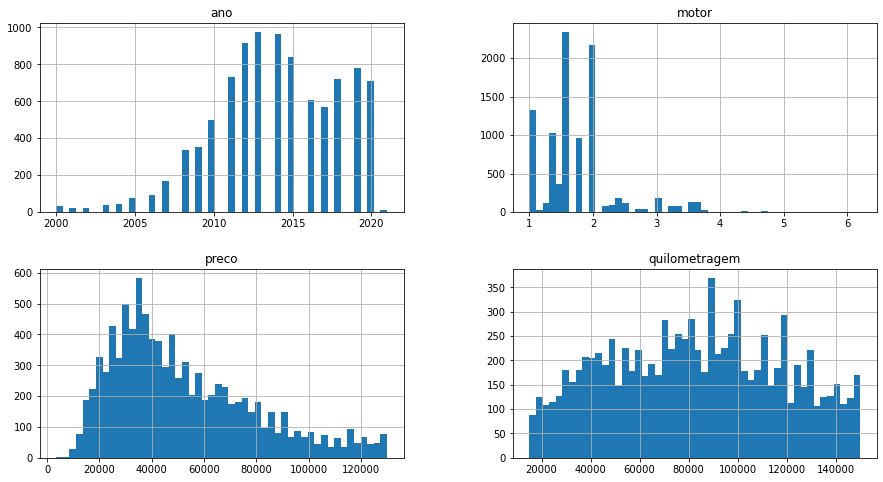

In [50]:
df.hist(bins=50, figsize=(15,8))

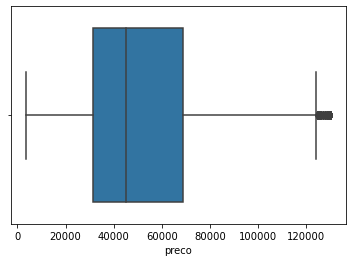

In [51]:
sns.boxplot(df['preco'])

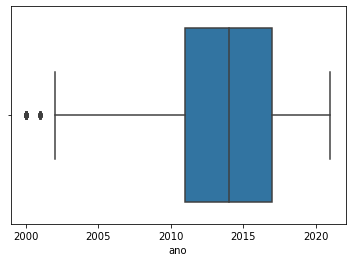

In [52]:
sns.boxplot(df['ano'])

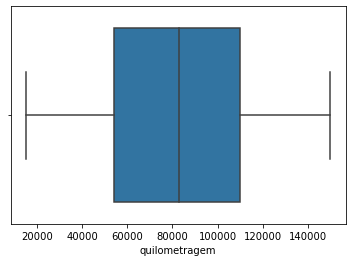

In [53]:
sns.boxplot(df['quilometragem'])

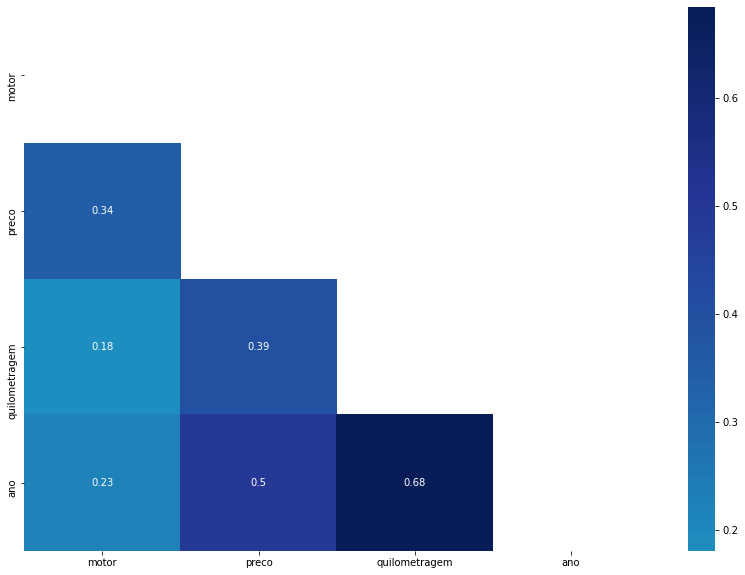

In [54]:
plt.figure(figsize=(14,10))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

## EDA

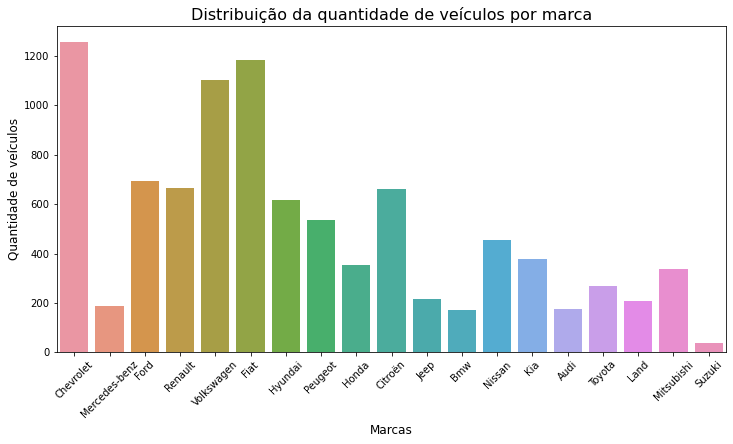

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['marca'],data = df)
plt.title('Distribuição da quantidade de veículos por marca', fontsize = 16)
plt.xlabel('Marcas', fontsize = 12)
plt.ylabel('Quantidade de veículos', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

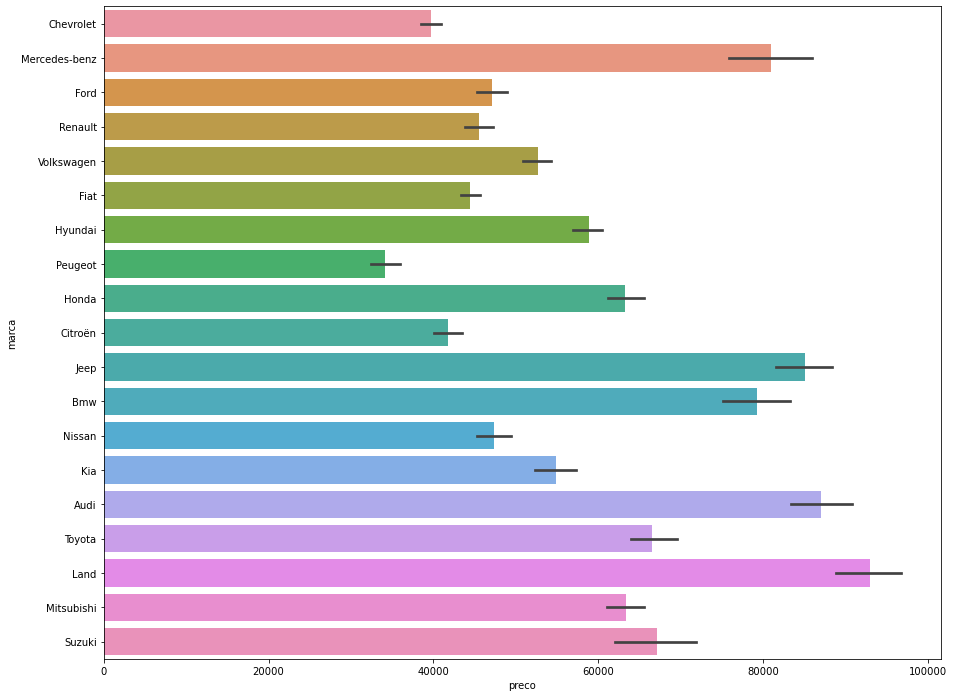

In [57]:
plt.figure(figsize = (15,12))
sns.barplot(y = 'marca', x = 'preco' , data = df )

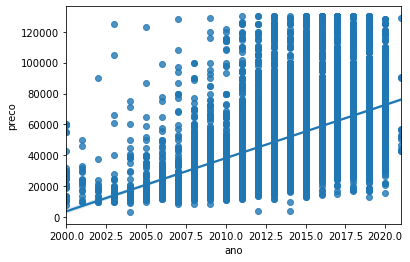

In [58]:
sns.regplot('ano','preco', data = df)

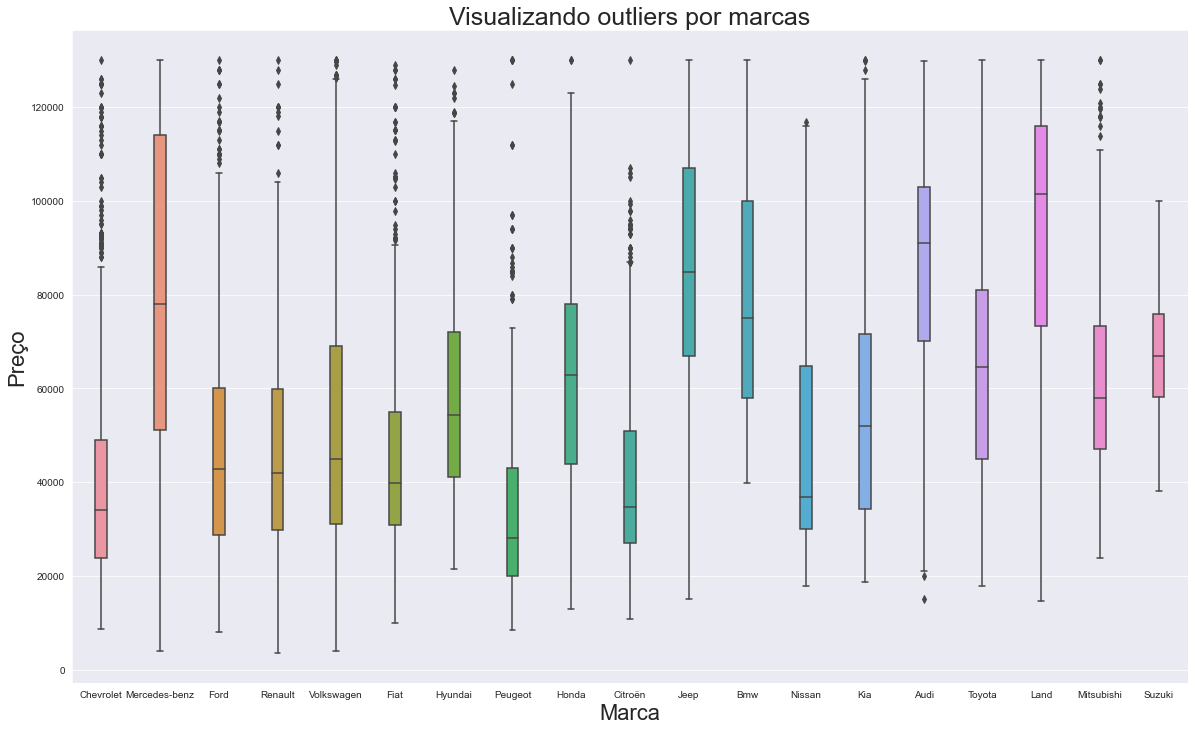

In [60]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='marca', y='preco', data=df, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Visualizando outliers por marcas', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Marca', fontsize=22)
ax

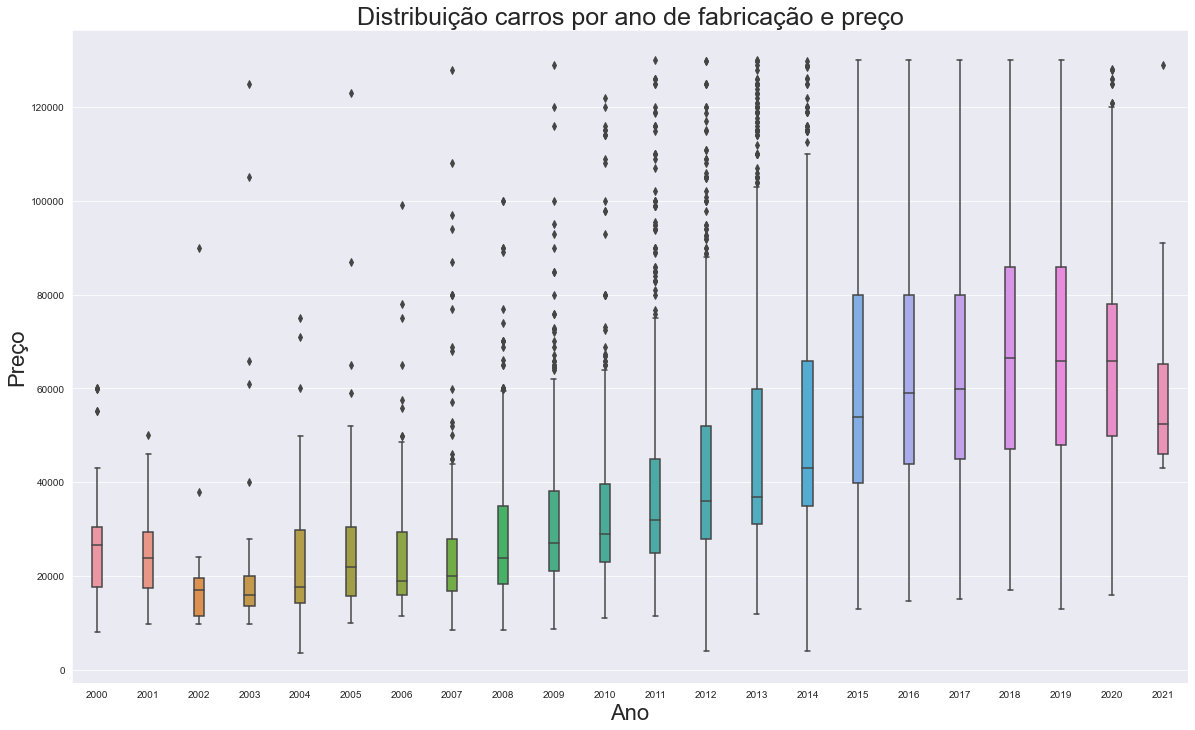

In [62]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='ano', y='preco', data=df, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros por ano de fabricação e preço', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Ano', fontsize=22)
ax

In [64]:
df.columns

Index(['motor', 'marca', 'modelo', 'preco', 'quilometragem', 'ano',
       'informacoes'],
      dtype='object')

Text(0.5, 1.15, 'Dispersão entre as variáveis')

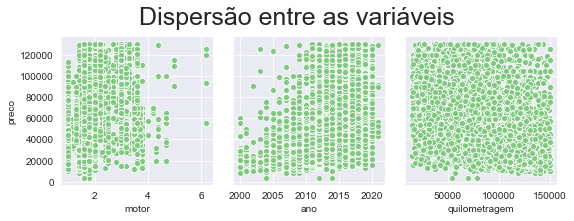

In [68]:
ax = sns.pairplot(data=df,y_vars = 'preco', x_vars = ['motor', 'ano', 'quilometragem'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=25 ,y=1.15)

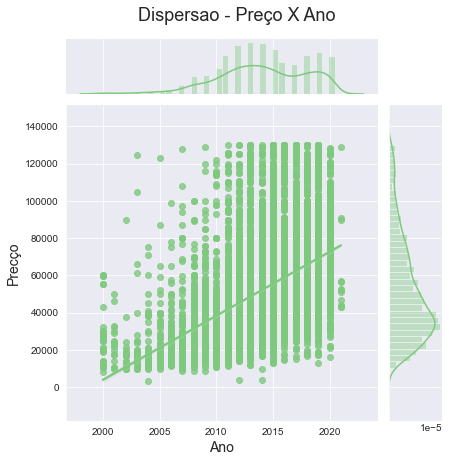

In [70]:
ax = sns.jointplot(x="ano", y="preco", data=df, kind = 'reg')
ax.fig.suptitle('Dispersao - Preço X Ano', fontsize=18, y=1.05)
ax.set_axis_labels("Ano", "Precço", fontsize=14)
ax

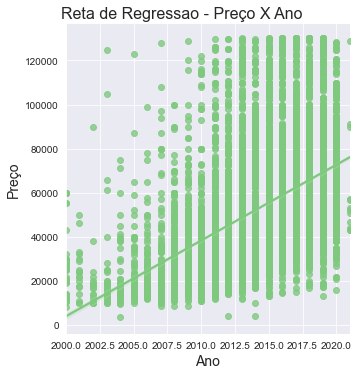

In [71]:
ax= sns.lmplot(x="ano", y="preco", data=df)
ax.fig.suptitle('Reta de Regressao - Preço X Ano', fontsize=16, y=1.02)
ax.set_xlabels("Ano", fontsize=14)
ax.set_ylabels("Preço", fontsize=14)
ax

 - Salvando o Dataset sem outliers em um arquivo csv.

In [ ]:
df.to_csv('carros_sem_outliers.csv',index =False , encoding = 'utf-8')